## Final Project Submission

Please fill out:
* Student name: Benjamin Toler
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [112]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
#import data
df1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df2 = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
df3 = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
df4 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df5 = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
df6 = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df7 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df8 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
df9 = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', 
                  encoding= 'unicode_escape')
df10 = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
df11 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]

# Data Exploration

In [114]:
#preview datasets
for index in range(len(dfs)):
    print("df",index+1)
    display(dfs[index].head(2))

df 1


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


df 2


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


df 3


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0


df 4


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


df 5


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


df 6


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN


df 7


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


df 8


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


df 9


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


df 10


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


df 11


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


Based on the inital preview of the dat above, We will combine datasets 3, 4, 7 from IMBD and select for areas of interests
including region, genre, runtime, and rating. Lets explore these 3 datasets mroe thoroughly before continuing

In [115]:
df3.title_id.value_counts()

tt2488496    61
tt1201607    55
tt2310332    55
tt2278871    53
tt1790809    53
             ..
tt3398218     1
tt3572044     1
tt1621896     1
tt1914254     1
tt4384148     1
Name: title_id, Length: 122302, dtype: int64

In [116]:
df3.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [117]:
df4.tconst.value_counts()

tt2171712    1
tt5651576    1
tt1650493    1
tt6859850    1
tt6149818    1
            ..
tt4768656    1
tt2009436    1
tt8269326    1
tt7137706    1
tt4384148    1
Name: tconst, Length: 146144, dtype: int64

In [118]:
df4.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


We see that df3 has many repeated title_ids with varying titles, whereas df4 has unique tconst which are equivalent to title_ids, therfore we will start by selecting the data we want from df4 which includes tconst, primary_title, start_year, runtime_mintutes, and genres. From the preview of the dat it seems that the primary_title is the English version of the original_title, so we will discard the original_title.

In [119]:
df4.drop('original_title', axis=1, inplace=True)

In [120]:
df4.head(2)

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"


As Mirosoft is an American company it makes sense to explore only movies made
in the US, as these will give the most accurate expectations for Microsoft. Therfore we will select only title_ids with 'region' = 'US' form df3 and inner join df3 with df4.

In [121]:
#select only US films
df3 = df3[df3.region == 'US']
#check that we only have US films
df3.region.unique()

array(['US'], dtype=object)

In [122]:
df3.shape

(51490, 8)

In [123]:
df3 = df3.drop_duplicates('title_id')
df3.shape

(47433, 8)

In [125]:
df3.title_id.value_counts()

tt4762486    1
tt2224506    1
tt6640384    1
tt1292566    1
tt3216348    1
            ..
tt3630800    1
tt1296373    1
tt2906216    1
tt2387433    1
tt2244838    1
Name: title_id, Length: 47433, dtype: int64

Now that we have the data we want from df3, we will join datsets 3 and 4 using the common title_id/tconst.

In [130]:
#set index of d3 to title_id
df3.set_index('title_id', inplace=True)

In [132]:
#join df3 with df4
df3_4 = df4.join(df3['region'], how='inner', on='tconst')
print(df3_4.shape)
df3_4.head()

(47433, 6)


,tconst,primary_title,start_year,runtime_minutes,genres,region
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,US
6,tt0112502,Bigfoot,2017,NaN,"Horror,Thriller",US
12,tt0159369,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,US
17,tt0192528,Heaven & Hell,2018,104.0,Drama,US
18,tt0230212,The Final Journey,2010,120.0,Drama,US


Now we will join df 7 to our joined df3_4, again using tconst

In [135]:
df7.set_index('tconst', inplace=True)

In [136]:
imbd_df = df3_4.join(df7, how='left', on='tconst')
print(imbd_df.shape)
imbd_df.head(5)

(47433, 8)


,tconst,primary_title,start_year,runtime_minutes,genres,region,averagerating,numvotes
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,US,6.9,4517.0
6,tt0112502,Bigfoot,2017,NaN,"Horror,Thriller",US,4.1,32.0
12,tt0159369,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,US,7.6,53.0
17,tt0192528,Heaven & Hell,2018,104.0,Drama,US,4.0,72.0
18,tt0230212,The Final Journey,2010,120.0,Drama,US,8.8,8.0


Now we will join the imbd_df with df1 which includes data about how much the movie makes. Since df1 does not conatain a tcosnt or title_id like our previous dfs, we need to join by the title name. By examining df1 below we notice an issue. For some movies, df1 includes the year in the title whereas the imbd_df does not.

In [153]:
print(df1.shape)
df1.head()

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [144]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [145]:
df1['foreign_gross'] = df1['foreign_gross'].map(lambda x: float(x.replace(',', '').replace('.',''))
                         if type(x) == str else float(0))

In [146]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [154]:
movie_df = imbd_df.merge(df1, how='inner', left_on=['primary_title', 'start_year'],
                        right_on=['title', 'year'])
movie_df.drop(['studio', 'start_year'], axis=1, inplace=True)

In [201]:
movie_df.drop_duplicates(subset='primary_title', keep=False, inplace=True)

In [202]:
movie_df['worldwide_gross'] = movie_df.domestic_gross + movie_df.foreign_gross

In [203]:
a = movie_df.primary_title.value_counts()
count = 0
for i in range(len(a)):
    if a[i] == 1:
        count += 1



In [207]:
movie_df.primary_title.value_counts()

The Grand Budapest Hotel                         1
Mortal Engines                                   1
Broken City                                      1
Pixels                                           1
The Karate Kid                                   1
                                                ..
Journey to the South Pacific                     1
Ingrid Bergman: In Her Own Words                 1
Golmaal 3                                        1
Legend of the Guardians: The Owls of Ga'Hoole    1
The Equalizer 2                                  1
Name: primary_title, Length: 1335, dtype: int64

In [208]:
movie_df.shape

(1335, 12)

df11 includes data that we'd be interested in such as month of movei release and production_budget

In [213]:
df11['year'] = df11.release_date.map(lambda x: int(x[-4:]))
df11['month'] = df11.release_date.map(lambda x: x[:3])
df11['domestic_gross'] = df11.domestic_gross.map(lambda x: float(x.replace('$','').replace(',','')))
df11['production_budget'] = df11.production_budget.map(lambda x: float(x.replace('$','').replace(',','')))
df11['worldwide_gross'] = df11.worldwide_gross.map(lambda x: float(x.replace('$','').replace(',','')))

In [218]:
df11.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,Dec


In [223]:
df11.shape

(5782, 8)

In [220]:
movie_2_df = imbd_df.merge(df11, how='inner', left_on=['primary_title', 'start_year'],
                        right_on=['movie', 'year'])

In [225]:
movie_2_df.shape

(1340, 16)

In [227]:
movie_2_df.drop(['start_year', 'id', 'release_date', 'movie'], axis=1, inplace=True)

In [228]:
movie_2_df

,tconst,primary_title,runtime_minutes,genres,region,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,year,month
0,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy",US,1.9,8248.0,45000000.0,0.0,7.370600e+04,2012,Dec
1,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",US,7.3,275300.0,91000000.0,58236838.0,1.878612e+08,2013,Dec
2,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",US,6.5,105116.0,28000000.0,26017685.0,6.210859e+07,2014,Sep
3,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",US,7.0,539338.0,215000000.0,652270625.0,1.648855e+09,2015,Jun
4,tt0376136,The Rum Diary,119.0,"Comedy,Drama",US,6.2,94787.0,45000000.0,13109815.0,2.154473e+07,2011,Oct
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,tt8155288,Happy Death Day 2U,100.0,"Drama,Horror,Mystery",US,6.3,27462.0,9000000.0,28051045.0,6.417950e+07,2019,Feb
1336,tt8266310,Blinded by the Light,117.0,"Biography,Comedy,Drama",US,6.2,173.0,15000000.0,0.0,0.000000e+00,2019,Aug
1337,tt8364368,Crawl,NaN,"Action,Horror,Thriller",US,NaN,NaN,17000000.0,0.0,0.000000e+00,2019,Jul
1338,tt8632862,Fahrenheit 11/9,128.0,Documentary,US,6.7,11628.0,5000000.0,6352306.0,6.653715e+06,2018,Sep


In [230]:
joined_movies = movie_df.merge(movie_2_df[['primary_title', 'production_budget', 'year', 'month']]
                                          ,how='inner', 
                               left_on=['primary_title','year'], 
                               right_on=['primary_title', 'year'])
joined_movies

,tconst,primary_title,runtime_minutes,genres,region,averagerating,numvotes,title,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,month
0,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",US,7.3,275300.0,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013,188100000.0,91000000.0,Dec
1,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",US,6.5,105116.0,A Walk Among the Tombstones,26300000.0,26900000.0,2014,53200000.0,28000000.0,Sep
2,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",US,7.0,539338.0,Jurassic World,652300000.0,10194.0,2015,652310194.0,215000000.0,Jun
3,tt0376136,The Rum Diary,119.0,"Comedy,Drama",US,6.2,94787.0,The Rum Diary,13100000.0,10800000.0,2011,23900000.0,45000000.0,Oct
4,tt0383010,The Three Stooges,92.0,"Comedy,Family",US,5.1,28570.0,The Three Stooges,44300000.0,10500000.0,2012,54800000.0,30000000.0,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,tt7349662,BlacKkKlansman,135.0,"Biography,Crime,Drama",US,7.5,149005.0,BlacKkKlansman,49300000.0,44000000.0,2018,93300000.0,15000000.0,Aug
923,tt7388562,"Paul, Apostle of Christ",108.0,"Adventure,Biography,Drama",US,6.7,5662.0,"Paul, Apostle of Christ",17600000.0,5500000.0,2018,23100000.0,5000000.0,Mar
924,tt7401588,Instant Family,118.0,"Comedy,Drama",US,7.4,46728.0,Instant Family,67400000.0,53200000.0,2018,120600000.0,48000000.0,Nov
925,tt7784604,Hereditary,127.0,"Drama,Horror,Mystery",US,7.3,151571.0,Hereditary,44100000.0,35300000.0,2018,79400000.0,10000000.0,Jun


In [313]:
total_movie_df = pd.concat([joined_movies, movie_df, movie_2_df])

In [314]:
total_movie_df.drop_duplicates('title', keep='first', inplace=True)

In [315]:
total_movie_df.shape

(1336, 14)

In [316]:
total_movie_df['worldwide_net_profit'] = total_df.worldwide_gross - total_df.production_budget

In [317]:
total_movie_df.head()

,tconst,primary_title,runtime_minutes,genres,region,averagerating,numvotes,title,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,month,worldwide_net_profit
0,tt0359950,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",US,7.3,275300.0,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013,188100000.0,91000000.0,Dec,97100000.0
1,tt0365907,A Walk Among the Tombstones,114.0,"Action,Crime,Drama",US,6.5,105116.0,A Walk Among the Tombstones,26300000.0,26900000.0,2014,53200000.0,28000000.0,Sep,25200000.0
2,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",US,7.0,539338.0,Jurassic World,652300000.0,10194.0,2015,652310194.0,215000000.0,Jun,437310194.0
3,tt0376136,The Rum Diary,119.0,"Comedy,Drama",US,6.2,94787.0,The Rum Diary,13100000.0,10800000.0,2011,23900000.0,45000000.0,Oct,-21100000.0
4,tt0383010,The Three Stooges,92.0,"Comedy,Family",US,5.1,28570.0,The Three Stooges,44300000.0,10500000.0,2012,54800000.0,30000000.0,Apr,24800000.0


In [318]:
grouped = total_movie_df.groupby('month').mean()
grouped

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,worldwide_net_profit
month,,,,,,,,,
Apr,106.166667,6.339583,133205.791667,7.899600e+07,6.748116e+07,2013.270833,1.464772e+08,5.131250e+07,9.516466e+07
Aug,105.562500,6.322500,123592.987500,5.599665e+07,6.239196e+07,2013.575000,1.183886e+08,4.007650e+07,7.831212e+07
Dec,118.460784,6.659804,163709.441176,8.180234e+07,1.231048e+08,2013.882353,2.037009e+08,5.739706e+07,1.463039e+08
Feb,107.724138,5.958621,131373.534483,7.526897e+07,8.572012e+07,2013.844828,1.609891e+08,4.649138e+07,1.144977e+08
Jan,104.102041,5.679592,75241.346939,3.954286e+07,3.577737e+07,2013.612245,7.532022e+07,3.384490e+07,4.147533e+07
Jul,107.158537,6.374390,187180.500000,9.936104e+07,1.653723e+08,2013.829268,2.647334e+08,7.316189e+07,1.915715e+08
Jun,110.867470,6.539759,186924.843373,1.233771e+08,1.780933e+08,2013.987952,3.014704e+08,8.082590e+07,2.206445e+08
Mar,107.306667,6.354667,145653.933333,6.714400e+07,9.237920e+07,2013.680000,1.595232e+08,6.066800e+07,9.885520e+07
May,111.590909,6.372727,213787.772727,1.101505e+08,1.920264e+08,2013.742424,3.021769e+08,9.567727e+07,2.064996e+08


In [319]:
order = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]

In [320]:
grouped.reset_index(inplace=True)

In [321]:
grouped.index = order

In [322]:
grouped.sort_index(inplace=True)

In [323]:
grouped.set_index('month', inplace=True)

In [324]:
grouped

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,worldwide_net_profit
month,,,,,,,,,
Jan,104.102041,5.679592,75241.346939,3.954286e+07,3.577737e+07,2013.612245,7.532022e+07,3.384490e+07,4.147533e+07
Feb,107.724138,5.958621,131373.534483,7.526897e+07,8.572012e+07,2013.844828,1.609891e+08,4.649138e+07,1.144977e+08
Mar,107.306667,6.354667,145653.933333,6.714400e+07,9.237920e+07,2013.680000,1.595232e+08,6.066800e+07,9.885520e+07
Apr,106.166667,6.339583,133205.791667,7.899600e+07,6.748116e+07,2013.270833,1.464772e+08,5.131250e+07,9.516466e+07
May,111.590909,6.372727,213787.772727,1.101505e+08,1.920264e+08,2013.742424,3.021769e+08,9.567727e+07,2.064996e+08
Jun,110.867470,6.539759,186924.843373,1.233771e+08,1.780933e+08,2013.987952,3.014704e+08,8.082590e+07,2.206445e+08
Jul,107.158537,6.374390,187180.500000,9.936104e+07,1.653723e+08,2013.829268,2.647334e+08,7.316189e+07,1.915715e+08
Aug,105.562500,6.322500,123592.987500,5.599665e+07,6.239196e+07,2013.575000,1.183886e+08,4.007650e+07,7.831212e+07
Sep,107.382022,6.519101,117810.157303,3.993064e+07,4.929885e+07,2013.528090,8.922949e+07,3.061742e+07,5.861208e+07


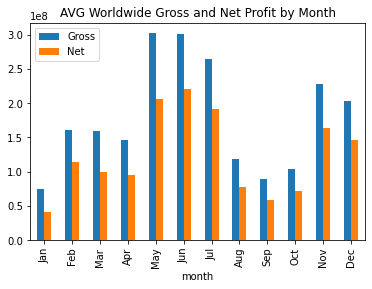

In [325]:
ax = grouped.plot(kind='bar', y=['worldwide_gross','worldwide_net_profit']);
ax.set_title('AVG Worldwide Gross and Net Profit by Month');
ax.legend(['Gross', 'Net'], loc=2)

In [326]:
total_movie_df.groupby('genres').mean().sort_values(by='worldwide_gross', ascending=False)

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,worldwide_net_profit
genres,,,,,,,,,
"Adventure,Fantasy",139.666667,7.166667,375770.333333,1.929000e+08,5.111333e+08,2013.333333,7.040333e+08,2.316667e+08,4.723667e+08
"Adventure,Drama,Sci-Fi",156.500000,8.300000,989725.000000,2.082000e+08,4.455500e+08,2014.500000,6.537500e+08,1.365000e+08,5.172500e+08
"Action,Adventure,Sci-Fi",131.704545,6.870455,445691.795455,2.492136e+08,3.767187e+08,2013.977273,6.259324e+08,1.771333e+08,4.693006e+08
"Comedy,Mystery",102.000000,6.500000,432800.000000,2.545000e+08,3.323000e+08,2011.000000,5.868000e+08,8.000000e+07,5.068000e+08
"Action,Adventure,Animation",99.666667,7.466667,211084.916667,1.681583e+08,3.086333e+08,2013.166667,4.767917e+08,1.381818e+08,3.814273e+08
...,...,...,...,...,...,...,...,...,...
"Animation,Family",77.000000,4.000000,431.000000,3.220000e+04,0.000000e+00,2014.000000,3.220000e+04,NaN,NaN
Thriller,117.000000,6.400000,1269.000000,2.560000e+04,0.000000e+00,2016.500000,2.560000e+04,NaN,NaN
"Action,Drama,War",113.000000,5.600000,13089.000000,1.750000e+04,0.000000e+00,2011.000000,1.750000e+04,1.200000e+07,-1.198250e+07


In [327]:
total_movie_df['genres'] = total_movie_df.genres.map(lambda x: x.split(","))

In [328]:
total_movie_df

,tconst,primary_title,runtime_minutes,genres,region,averagerating,numvotes,title,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,month,worldwide_net_profit
0,tt0359950,The Secret Life of Walter Mitty,114.0,"[Adventure, Comedy, Drama]",US,7.3,275300.0,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013,188100000.0,91000000.0,Dec,97100000.0
1,tt0365907,A Walk Among the Tombstones,114.0,"[Action, Crime, Drama]",US,6.5,105116.0,A Walk Among the Tombstones,26300000.0,26900000.0,2014,53200000.0,28000000.0,Sep,25200000.0
2,tt0369610,Jurassic World,124.0,"[Action, Adventure, Sci-Fi]",US,7.0,539338.0,Jurassic World,652300000.0,10194.0,2015,652310194.0,215000000.0,Jun,437310194.0
3,tt0376136,The Rum Diary,119.0,"[Comedy, Drama]",US,6.2,94787.0,The Rum Diary,13100000.0,10800000.0,2011,23900000.0,45000000.0,Oct,-21100000.0
4,tt0383010,The Three Stooges,92.0,"[Comedy, Family]",US,5.1,28570.0,The Three Stooges,44300000.0,10500000.0,2012,54800000.0,30000000.0,Apr,24800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,tt8075192,Shoplifters,121.0,"[Crime, Drama]",US,8.0,31228.0,Shoplifters,3300000.0,0.0,2018,3300000.0,NaN,NaN,NaN
1356,tt8097306,Nobody's Fool,110.0,"[Comedy, Drama, Romance]",US,4.6,3618.0,Nobody's Fool,31700000.0,1800000.0,2018,33500000.0,NaN,NaN,NaN
1357,tt8108198,Andhadhun,139.0,"[Crime, Thriller]",US,8.5,43409.0,Andhadhun,1200000.0,0.0,2018,1200000.0,NaN,NaN,NaN
1358,tt8267604,Capernaum,126.0,[Drama],US,8.5,20215.0,Capernaum,1700000.0,0.0,2018,1700000.0,NaN,NaN,NaN


In [353]:
total_movie_df['ROI'] = total_movie_df.worldwide_net_profit / total_movie_df.production_budget

In [354]:
total_movie_df

,tconst,primary_title,runtime_minutes,genres,region,averagerating,numvotes,title,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,month,worldwide_net_profit,ROI
0,tt0359950,The Secret Life of Walter Mitty,114.0,"[Adventure, Comedy, Drama]",US,7.3,275300.0,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013,188100000.0,91000000.0,Dec,97100000.0,1.067033
1,tt0365907,A Walk Among the Tombstones,114.0,"[Action, Crime, Drama]",US,6.5,105116.0,A Walk Among the Tombstones,26300000.0,26900000.0,2014,53200000.0,28000000.0,Sep,25200000.0,0.900000
2,tt0369610,Jurassic World,124.0,"[Action, Adventure, Sci-Fi]",US,7.0,539338.0,Jurassic World,652300000.0,10194.0,2015,652310194.0,215000000.0,Jun,437310194.0,2.034001
3,tt0376136,The Rum Diary,119.0,"[Comedy, Drama]",US,6.2,94787.0,The Rum Diary,13100000.0,10800000.0,2011,23900000.0,45000000.0,Oct,-21100000.0,-0.468889
4,tt0383010,The Three Stooges,92.0,"[Comedy, Family]",US,5.1,28570.0,The Three Stooges,44300000.0,10500000.0,2012,54800000.0,30000000.0,Apr,24800000.0,0.826667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,tt8075192,Shoplifters,121.0,"[Crime, Drama]",US,8.0,31228.0,Shoplifters,3300000.0,0.0,2018,3300000.0,NaN,NaN,NaN,NaN
1356,tt8097306,Nobody's Fool,110.0,"[Comedy, Drama, Romance]",US,4.6,3618.0,Nobody's Fool,31700000.0,1800000.0,2018,33500000.0,NaN,NaN,NaN,NaN
1357,tt8108198,Andhadhun,139.0,"[Crime, Thriller]",US,8.5,43409.0,Andhadhun,1200000.0,0.0,2018,1200000.0,NaN,NaN,NaN,NaN
1358,tt8267604,Capernaum,126.0,[Drama],US,8.5,20215.0,Capernaum,1700000.0,0.0,2018,1700000.0,NaN,NaN,NaN,NaN


In [331]:
final_movie_df = total_movie_df.explode('genres')

In [332]:
final_movie_df

,tconst,primary_title,runtime_minutes,genres,region,averagerating,numvotes,title,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,month,worldwide_net_profit
0,tt0359950,The Secret Life of Walter Mitty,114.0,Adventure,US,7.3,275300.0,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013,188100000.0,91000000.0,Dec,97100000.0
0,tt0359950,The Secret Life of Walter Mitty,114.0,Comedy,US,7.3,275300.0,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013,188100000.0,91000000.0,Dec,97100000.0
0,tt0359950,The Secret Life of Walter Mitty,114.0,Drama,US,7.3,275300.0,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013,188100000.0,91000000.0,Dec,97100000.0
1,tt0365907,A Walk Among the Tombstones,114.0,Action,US,6.5,105116.0,A Walk Among the Tombstones,26300000.0,26900000.0,2014,53200000.0,28000000.0,Sep,25200000.0
1,tt0365907,A Walk Among the Tombstones,114.0,Crime,US,6.5,105116.0,A Walk Among the Tombstones,26300000.0,26900000.0,2014,53200000.0,28000000.0,Sep,25200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,tt8108198,Andhadhun,139.0,Thriller,US,8.5,43409.0,Andhadhun,1200000.0,0.0,2018,1200000.0,NaN,NaN,NaN
1358,tt8267604,Capernaum,126.0,Drama,US,8.5,20215.0,Capernaum,1700000.0,0.0,2018,1700000.0,NaN,NaN,NaN
0,tt0249516,Foodfight!,91.0,Action,US,1.9,8248.0,NaN,0.0,NaN,2012,73706.0,45000000.0,Dec,-44926294.0
0,tt0249516,Foodfight!,91.0,Animation,US,1.9,8248.0,NaN,0.0,NaN,2012,73706.0,45000000.0,Dec,-44926294.0


In [334]:
grouped_2 = final_movie_df.groupby('genres').mean().sort_values(by='worldwide_gross', ascending=False)

In [335]:
grouped_2

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,worldwide_net_profit
genres,,,,,,,,,
Sci-Fi,117.875000,6.650000,320108.854167,1.487336e+08,2.280094e+08,2013.989583,3.791372e+08,1.109267e+08,2.874124e+08
Animation,94.288660,6.491753,123738.701031,1.331918e+08,2.428250e+08,2013.958763,3.735142e+08,1.069207e+08,3.205168e+08
Adventure,111.753165,6.506646,208240.683544,1.274327e+08,2.289317e+08,2014.167722,3.570898e+08,1.158592e+08,2.722029e+08
Action,115.242105,6.382895,189939.984211,9.391574e+07,1.566362e+08,2013.989474,2.505510e+08,9.293267e+07,1.896268e+08
Fantasy,112.010101,6.242424,162565.939394,8.217460e+07,1.601356e+08,2013.777778,2.423102e+08,9.471463e+07,1.631033e+08
Musical,123.800000,6.480000,83886.000000,7.542000e+07,1.260400e+08,2014.600000,2.014600e+08,6.966667e+07,1.249667e+08
Family,104.734375,6.050000,82928.593750,7.485355e+07,1.085247e+08,2012.812500,1.833783e+08,7.327705e+07,1.145209e+08
Western,125.250000,6.825000,246476.000000,6.321250e+07,7.152500e+07,2012.625000,1.347375e+08,9.360000e+07,9.672000e+07
Comedy,104.486275,6.216667,92472.911765,5.724811e+07,7.651706e+07,2013.666667,1.336153e+08,4.756274e+07,1.200749e+08


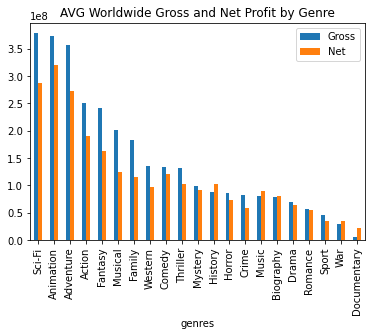

In [338]:
ax = grouped_2.plot(kind='bar', y=['worldwide_gross','worldwide_net_profit']);
ax.set_title('AVG Worldwide Gross and Net Profit by Genre');
ax.legend(['Gross', 'Net'], loc=1)

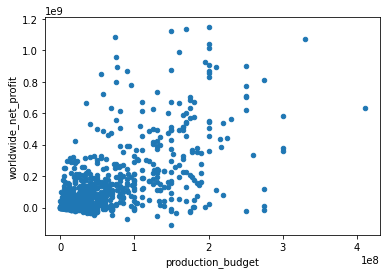

In [359]:
ax = total_movie_df.plot(kind='scatter', x='production_budget', y='worldwide_net_profit')

In [357]:
total_movie_df.production_budget.corr(total_movie_df.ROI)

-0.08078797054440613